In [1]:
## 나이브 베이즈에 대해 알아보자
## naive.pdf참고 

'''
나이브 베이즈 : 연속적인 특성으로 분류기 훈련 

- 베이즈 이론은 <u>새로운 정보P(A|B)</u>와 <u>사건의 사전 확률 P(A)</u>가 주어졌을 때 <u>어떤 사건이 일어날 확률</u>을 이해하는 방법을 지칭합니다. 

- 조건부 독립: 확률변수 A, B가 독립이면, A와 B의 결합확률은 주변확률의 곱과 같다. 

  조건이 되는 별개의 확률 변수 C 가 존재하며, 조건이 되는 확률변수 C에 대한 A,B의 결합조건부 확률은 C에 대한 A,B의 조건부 확률과 같다. (조건부 독립)

  일반적인 독립은 '무조건 독립 확률'

  조건부 독립 확률과 무조건 독립 확률간의 관계가 없다.(가령, 두 확률변수가 독립이라고 해서 항상 조건부 독립 확률이 되는 것은 아니며, 조건부 독립 확률이라고 해서 확률 변수가 항상 독립이 되는 것도 아니다.) 
'''

"\n나이브 베이즈 : 연속적인 특성으로 분류기 훈련 \n\n- 베이즈 이론은 <u>새로운 정보P(A|B)</u>와 <u>사건의 사전 확률 P(A)</u>가 주어졌을 때 <u>어떤 사건이 일어날 확률</u>을 이해하는 방법을 지칭합니다. \n\n- 조건부 독립: 확률변수 A, B가 독립이면, A와 B의 결합확률은 주변확률의 곱과 같다. \n\n  조건이 되는 별개의 확률 변수 C 가 존재하며, 조건이 되는 확률변수 C에 대한 A,B의 결합조건부 확률은 C에 대한 A,B의 조건부 확률과 같다. (조건부 독립)\n\n  일반적인 독립은 '무조건 독립 확률'\n\n  조건부 독립 확률과 무조건 독립 확률간의 관계가 없다.(가령, 두 확률변수가 독립이라고 해서 항상 조건부 독립 확률이 되는 것은 아니며, 조건부 독립 확률이라고 해서 확률 변수가 항상 독립이 되는 것도 아니다.) \n"

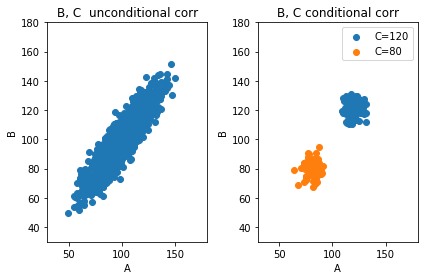

In [2]:
import numpy as np
C=np.random.normal(100, 15, 2000)
A=C+np.random.normal(0, 5, 2000) # 표준편차 5인 정규분포 데이터
B=C+np.random.normal(0, 5, 2000)  #표준편차 5인 정규분포 데이터

#시각화를 통해서 B, C 는 상관관계 있지만, A와 B는 서로 독립임을 확인
import matplotlib.pyplot as plt
plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B, C  unconditional corr")

plt.subplot(122)
idx1 = (118<C) & (C<122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B, C conditional corr")
plt.tight_layout()
plt.show()

#조건부 확률변수 C와 두 확률변수 A, B는 상관관계가 있지만,
#조건부 확률변수 C를 고정시켰을 때 두 확률변수 A, B는 독립임을 확인할 수 있음


In [3]:
#다른 유사 예시
# https://datascienceschool.net/view-notebook/c19b48e3c7b048668f2bb0a113bd25f7/
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

In [4]:
# matplotlib 한글설정 
# http://corazzon.github.io/matplotlib_font_setting

# 1. 필요한 패키지 가져오기 

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 2. 폰트를 설정해 주기에 앞서 설치 된 matplotlib 의 버전과 위치정보를 가져옵니다.
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

# 3. matplotlib의 위치정보를 알았으니 터미널을 이용해 해당 위치로 가봅니다.
print ('설정파일 위치: ', mpl.matplotlib_fname())

# 4. 설치된 폰트를 찍어봅시다
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print('폰트갯수:',len(font_list)) 

# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10] 
f = [f.name for f in fm.fontManager.ttflist]
f[:10]

#나눔고딕을 사용할 것이기 때문에 이름에 Nanum 이 들어간 폰트만 가져오기 
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NANUM' in f.fname]

#링크 후술 내용에 따라 그냥 폰트 폴더로 옮겨버림 
print ('설정파일 위치: ', mpl.matplotlib_fname())

버전:  3.1.3
설치 위치:  C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\student\.matplotlib
캐시 위치:  C:\Users\student\.matplotlib
설정파일 위치:  C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\mpl-data\matplotlibrc
폰트갯수: 366
설정파일 위치:  C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\mpl-data\matplotlibrc


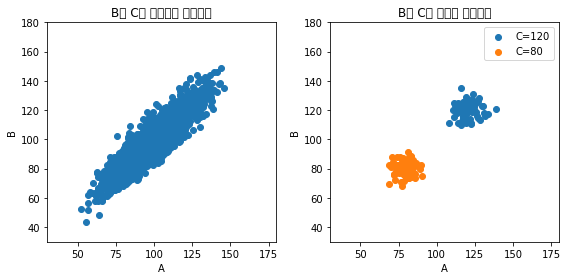

In [6]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B와 C의 무조건부 상관관계")

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()

In [6]:
'''
Naive Bayes 분류 모델 은 모든 차원의 개별 독립 변수가 서로 조건부 독립이라는 가정을 사용합니다. 

GaussianNB:  연속적인 데이터에 적용, 정규분포 NB
BernouliNB :  이진 데이터에 적용, 
MultinomialNB : 다항분포 NB, 카운트 데이터(특성의 출현 횟수, 문장의 단어 출현횟수 )

BernouliNB, MultinomialNB 는 텍스트 데이터 분류 에 사용

'''
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()  # 데이터 로드
features = iris.data
target = iris.target

classifer = GaussianNB()  # 가우시안 나이브 베이지 객체 생성
model = classifer.fit(features, target)  # 모델 훈련
new_observation = [[ 4,  4,  4,  0.4]]    #New Sample Data
print(model.predict(new_observation))   # 클래스 예측

# 각 클래스별 사전 확률을 지정한 가우시안 나이브 베이즈 객체 생성
clf = GaussianNB(priors=[0.25, 0.25, 0.5])
model = classifer.fit(features, target)  # 모델  훈련 
new_observation = [[ 4,  4,  4,  0.4]]    #New Sample Data
print(model.predict(new_observation))   # 클래스 예측

#GaussianNB의 속성 theta_은 정규분포의 기댓값
#GaussianNB의 속성 sigma_는 정규분포의 분산

[1]
[1]


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-p

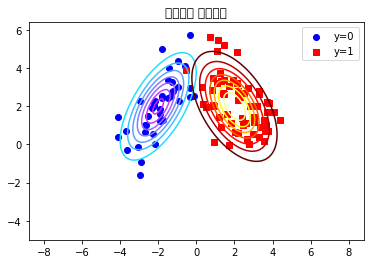

In [7]:

#모의 데이터 생성
import scipy as sp
np.random.seed(0)
#다변량 정규값을 랜덤하게 생성 multivariate_normal( mean = None , cov = 1 , allow_singular = False , seed = None ) 
rv0 =sp.stats.multivariate_normal([-2, 2], [[1, 0.9], [0.9, 2]])   
rv1 =sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

import matplotlib as mpl
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)
#y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률
model_norm.classes_   #종속변수 Y의 클래스(라벨)
model_norm.class_count_  #종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
model_norm.class_prior_ #종속변수 Y의 무조건부 확률 분포 P(Y)

##설명변수 x의 기댓값 , 정규분포의 분산  (확률 분포의 모수)

model_norm.theta_[0], model_norm.sigma_[0]
model_norm.theta_[1], model_norm.sigma_[1]

x_new = [0, 0]  #새로운 관측 데이터 
model_norm.predict_proba([x_new])  # 예측확률


array([[0.48733438, 0.51266562]])

In [9]:
'''
다항 나이브베이즈 분류
es/ 스팸 메일 필터링 : BOW 인코딩을 할 때, 각 키워드가 출현한 빈도를 직접 입력 변수로 사용
'''
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)
model_mult.classes_            
model_mult.class_count_
np.exp(model_mult.class_log_prior_) #종속변수 Y의 무조건부 확률분포의 로그 


array([0.4, 0.6])

In [14]:
# 각 클래스에 대한 가능도 확률분포를 구한다. 
# 예 :  다항분포 모형을 사용하므로 각 클래스를 4개의 면을 가진 주사위로 생각할 수 있다. 
# 그리고 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나누면 된다. 
 
fc = model_mult.feature_count_  #각 클래스의 면이 나오는 횟수
print(fc)
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

[[12. 16.  3.  9.]
 [ 5.  7. 18. 18.]]


array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [15]:
'''스무딩(smoothing)
# 표본 데이터의 수가 적은 경우에는 모수에 대해   스무딩(smoothing)을 합니다.
# 표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수도 있다. 
# 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 
# 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 
  두 개의 가상 표본 데이터를 추가한다. 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 
  가까운 값으로 변한다. 
# 라플라스 스무딩(Laplace smoothing) 또는 애드원(Add-One) 스무딩
# 극단적인 추정을 피하기 위해 이 값을 가중치 1인 스무딩을 한 추정값을 사용한다.
'''
model_mult.alpha
(fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:,np.newaxis],4,axis=1) + model_mult.alpha * X.shape[1])
# 모수 추정치
theta = np.exp(model_mult.feature_log_prob_)  #다항분포의 모수의 로그
theta
# 어떤 메일에 1번부터 4번까지의 키워드가 각각 10번씩 나왔다면 다음처럼 확률을 구할 수 있다. 
# 구해진 확률로부터 이 메일이 스팸임을 알 수 있다.
x_new = np.array([10, 10, 10, 10])  #새로운 관측 데이터
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [16]:
## 베르누이 나이브 베이즈 분류
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
#데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
#데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 
 
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)
#y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률의 값
model_bern.classes_
model_bern.class_count_
np.exp(model_bern.class_log_prior_)

#각 클래스  k  별로, 그리고 각 독립변수  d  별로, 각각 다른 베르누이 확률변수라고 가정하여 모두 8개의 베르누이 확률변수의 모수를 구하면
fc = model_bern.feature_count_
fc
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

model_bern.alpha  #스무딩 가중치 값
#스무딩이 적용된 베르누이 모수값
theta = np.exp(model_bern.feature_log_prob_)
theta
 
x_new = np.array([0, 1, 1, 1])  #새로운 관측 데이터 
model_bern.predict_proba([x_new])  #정상 , 스팸메일 분류 확률 확인

array([[0.34501348, 0.65498652]])

In [17]:
## 확률 보정 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

iris = datasets.load_iris()  # 데이터 로드
features = iris.data
target = iris.target

classifer = GaussianNB()  # 가우시안 나이브 베이즈 객체 생성
# 시그모이드 보정을 사용해 보정 교차 검증을 만듭니다.
classifer_sigmoid = CalibratedClassifierCV(classifer, cv=2, method='sigmoid')
classifer_sigmoid.fit(features, target) # 확률을 보정
new_observation = [[ 2.6,  2.6,  2.6,  0.4]]  #New Sample Data
classifer_sigmoid.predict_proba(new_observation)  # 보정된 확률을 확인 

# 가우시안 나이브 베이즈를 훈련하고 클래스 확률을 예측합니다.
classifer.fit(features, target).predict_proba(new_observation)
classifer_sigmoid.predict_proba(new_observation) # 보정된 확률을 확인

array([[0.31859969, 0.63663466, 0.04476565]])